# US Flight Exploration

# Preliminary Wrangling

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, in 2008

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

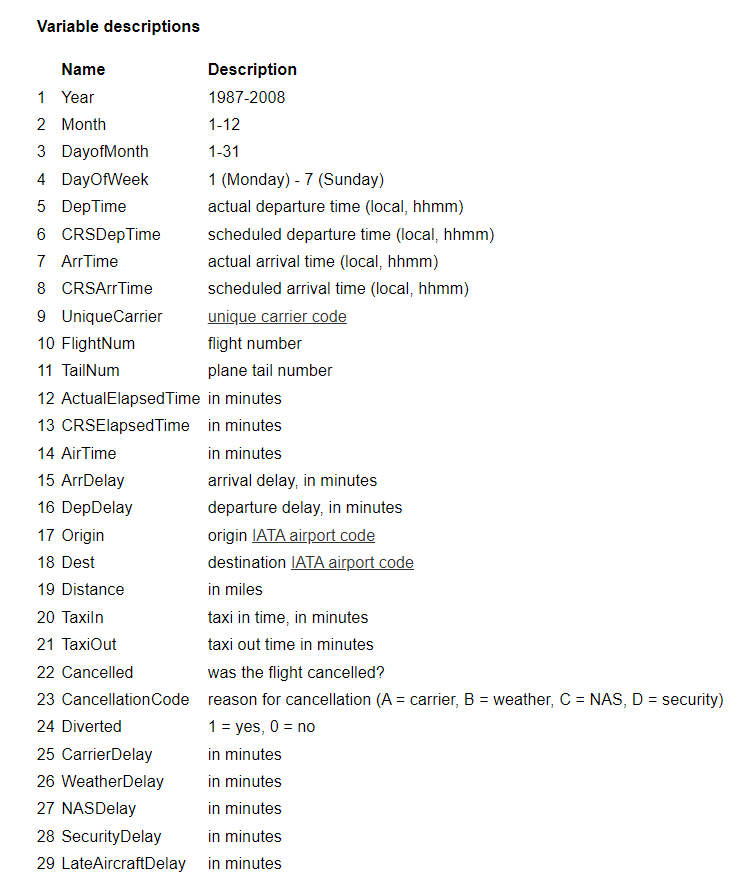

In [2]:
df = pd.read_csv('2008.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.shape

(7009728, 29)

In [5]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               7009728 non-null  int64  
 1   Month              7009728 non-null  int64  
 2   DayofMonth         7009728 non-null  int64  
 3   DayOfWeek          7009728 non-null  int64  
 4   DepTime            6873482 non-null  float64
 5   CRSDepTime         7009728 non-null  int64  
 6   ArrTime            6858079 non-null  float64
 7   CRSArrTime         7009728 non-null  int64  
 8   UniqueCarrier      7009728 non-null  object 
 9   FlightNum          7009728 non-null  int64  
 10  TailNum            6926363 non-null  object 
 11  ActualElapsedTime  6855029 non-null  float64
 12  CRSElapsedTime     7008884 non-null  float64
 13  AirTime            6855029 non-null  float64
 14  ArrDelay           6855029 non-null  float64
 15  DepDelay           6873482 non-n

In [6]:
#Compine year, month and day in one column
cols=["Year","Month","DayofMonth"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['date']=pd.to_datetime(df['date'])

In [7]:
#Correcting datatypes 
col_to_string = ['Year', 'Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier', 'FlightNum','Cancelled',
                 'CancellationCode', 'Diverted']
df[col_to_string] = df[col_to_string].astype(str)

In [8]:
df['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [9]:
df[df['Cancelled']=='1'].isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              136246
CRSDepTime                0
ArrTime              137434
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum               83358
ActualElapsedTime    137434
CRSElapsedTime          246
AirTime              137434
ArrDelay             137434
DepDelay             136246
Origin                    0
Dest                      0
Distance                  0
TaxiIn               137434
TaxiOut              137058
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         137434
WeatherDelay         137434
NASDelay             137434
SecurityDelay        137434
LateAircraftDelay    137434
date                      0
dtype: int64

In [10]:
#Maybe we should fill the null values with 0 because it didn't happen
df[df['Cancelled']=='1'] = df[df['Cancelled']=='1'].fillna(0)

In [11]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                14215
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    7
ActualElapsedTime      17265
CRSElapsedTime           598
AirTime                17265
ArrDelay               17265
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 14215
TaxiOut                    0
Cancelled                  0
CancellationCode           0
Diverted                   0
CarrierDelay         5347559
WeatherDelay         5347559
NASDelay             5347559
SecurityDelay        5347559
LateAircraftDelay    5347559
date                       0
dtype: int64

In [12]:
#Using interpolation method to fill the missing values
df['CarrierDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['WeatherDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['NASDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['SecurityDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['LateAircraftDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)

df['ArrTime'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)

df['ActualElapsedTime'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['CRSElapsedTime'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['AirTime'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)
df['ArrDelay'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)

df['TaxiIn'].interpolate(method='linear',limit_direction = 'both',axis=0,inplace=True)

In [13]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              7
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
date                 0
dtype: int64

In [14]:
#Correcting time to be easier to read and use
df['DepTime'] = df['DepTime'].astype(int).astype(str).apply(lambda x : x.zfill(4)[:-2]+':'+x.zfill(4)[-2:])
df['CRSDepTime'] = df['CRSDepTime'].astype(int).astype(str).apply(lambda x : x.zfill(4)[:-2]+':'+x.zfill(4)[-2:])
df['ArrTime'] = df['ArrTime'].astype(int).astype(str).apply(lambda x : x.zfill(4)[:-2]+':'+x.zfill(4)[-2:])
df['CRSArrTime'] = df['CRSArrTime'].astype(int).astype(str).apply(lambda x : x.zfill(4)[:-2]+':'+x.zfill(4)[-2:])

In [15]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,...,8.0,0,nan,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,...,10.0,0,nan,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,...,17.0,0,nan,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
3,2008,1,3,4,09:26,09:30,10:54,11:00,WN,1746,...,7.0,0,nan,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
4,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,...,10.0,0,nan,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


# Univariate Exploration

In [16]:
df['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

# How many flights turned to be cancelled?

1.96% of the flights in 2008 have been cancelled

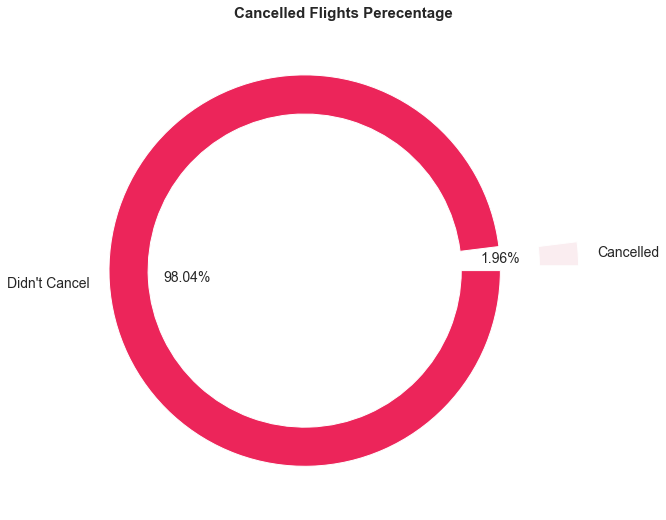

In [40]:
plt.figure(figsize=(12,9))
plt.pie(df['Cancelled'].value_counts(),labels=["Didn't Cancel","Cancelled"],autopct='%.2f%%',explode=(0.2, 0.2),
        counterclock=False,colors=['#EC255A','#FAEDF0'],textprops={'fontsize': 14},wedgeprops = {'width' : 0.2});
plt.title("Cancelled Flights Perecentage",fontsize=15,weight='bold');

# So what was the reason for the flight to be cancelled?

In [42]:
#making a sub dataset for cancelled flights only
df_cancel = df.query("Cancelled == '1'")

In [43]:
x=df_cancel['CancellationCode'].value_counts()
x.index

Index(['B', 'A', 'C', 'D'], dtype='object')

It looks like that the big two reasons for cancellation are Weather and Carrier problem both with the proportion of 39% and a very small difference

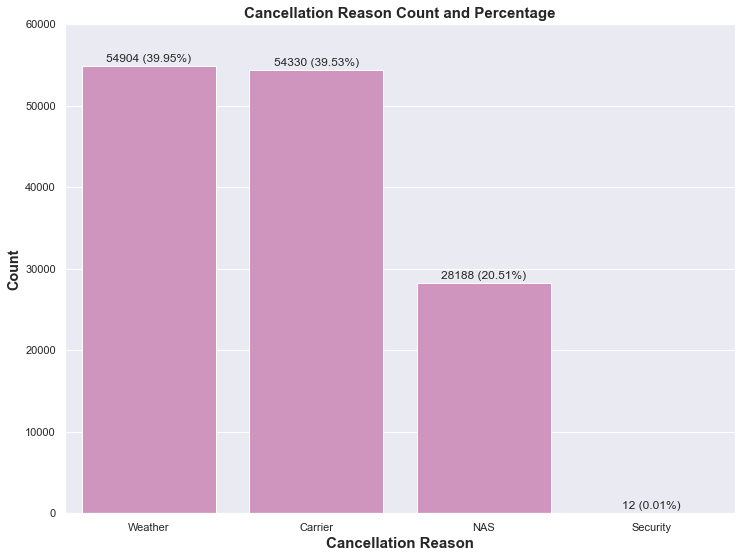

In [44]:
plt.figure(figsize=(12,9))

sns.set_theme(style="darkgrid")

sns.countplot(df_cancel['CancellationCode'],
              order=x.index,color=sns.color_palette()[6]).set_xticklabels(['Weather','Carrier','NAS','Security']);

plt.ylim(0,60000)

for i in range(x.shape[0]):
    count = x[i]
    pct = x[i]/df_cancel['CancellationCode'].shape[0]
    pct = (round(pct, 5)*100).round(2)
    plt.text(x=i, y=count+1500, s=f"{count} ({pct}%)", va='top', ha='center')
    
plt.xlabel('Cancellation Reason', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title("Cancellation Reason Count and Percentage",fontsize =15, weight='bold');

# Which month had the most cancellation?

The most canceled flights were in February, December and January, It's obvious that it is because winter

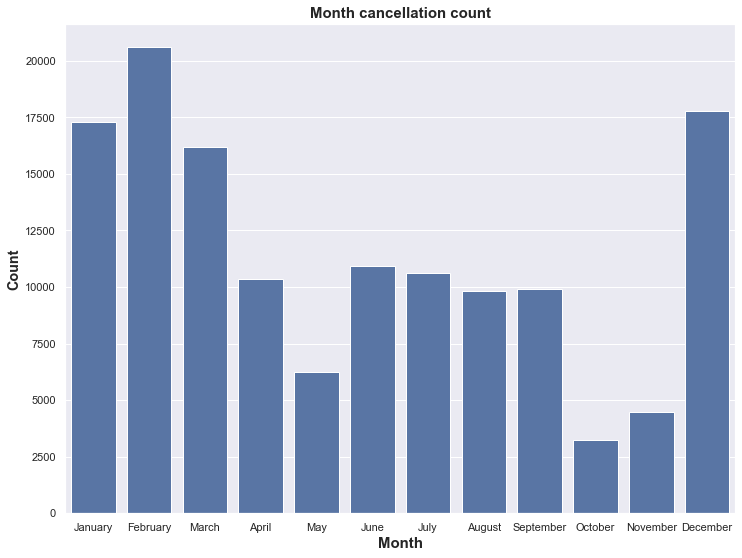

In [63]:
months_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12,9))
sns.countplot(data=df_cancel, x=df_cancel['date'].dt.month_name(), order=months_order,color = sns.color_palette()[0]);
plt.xlabel('Month', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title('Month cancellation count',fontsize=15,weight='bold');

# Which day had the most cancellation?

Traveling on Friday or Tuesday will be a bad decision as they have the most cancalled flights

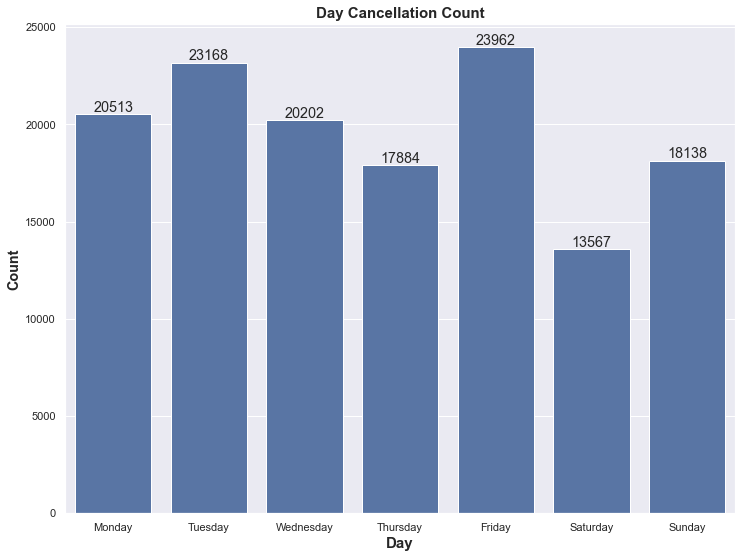

In [61]:
plt.figure(figsize=(12,9))
days_ordered = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_cancel['days_ordered'] = pd.Categorical(df_cancel['date'].dt.day_name(), categories=days_ordered, ordered=True)

sns.countplot(data=df_cancel, x=df_cancel['days_ordered'],color = sns.color_palette()[0]);
for i in range(df_cancel['days_ordered'].value_counts().shape[0]):
    count = df_cancel['days_ordered'].value_counts().sort_index()[i]
    plt.text(x=i, y=count+700, s=f"{count}", va='top', ha='center',size='large')    

plt.xlabel('Day', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title('Day Cancellation Count',fontsize=15,weight='bold');

# Which carrier had their flights cancalled the most?

If your carrier is MQ or AA, I have a bad news for you. AA and MQ carries had their flights cancelled the most.

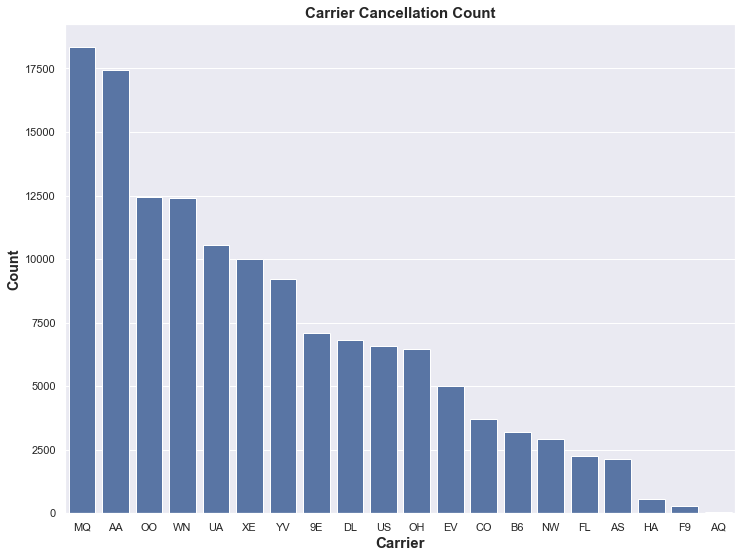

In [48]:
plt.figure(figsize=(12,9))

order = df_cancel['UniqueCarrier'].value_counts().index

sns.countplot(data=df_cancel,x='UniqueCarrier',color = sns.color_palette()[0],order=order);

plt.xlabel('Carrier', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title('Carrier Cancellation Count',fontsize=15,weight='bold');

In [49]:
x=df_cancel['Origin'].value_counts()[:10]
x

ORD    15050
DFW     7272
ATL     5830
LGA     5753
EWR     4511
BOS     3655
IAH     3261
JFK     3196
LAX     2838
SFO     2790
Name: Origin, dtype: int64

# Which airport had the most cancelled flights?

Chicago O'Hare International Airport had the most cancelled flights

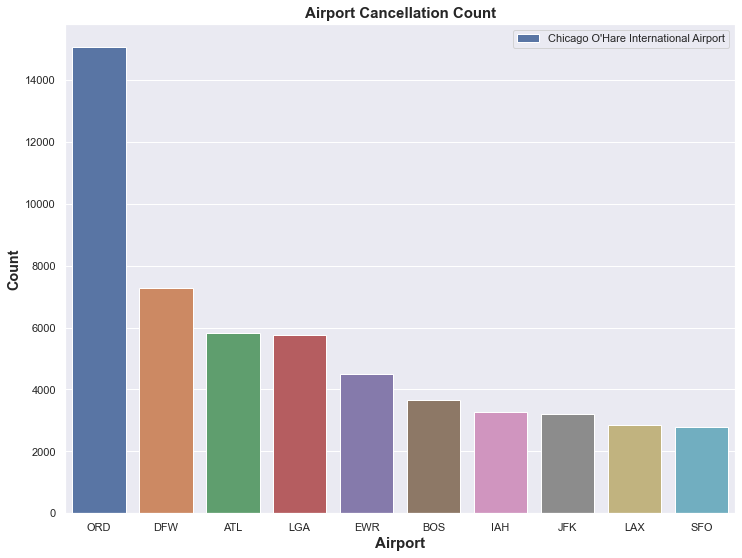

In [50]:
plt.figure(figsize=(12,9))
sns.countplot(x=df_cancel['Origin'],order=x.index);
plt.legend(["Chicago O'Hare International Airport"]);
plt.xlabel('Airport', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title('Airport Cancellation Count',fontsize=15,weight='bold');

# Checking AirTime and Distance Distrubtion 

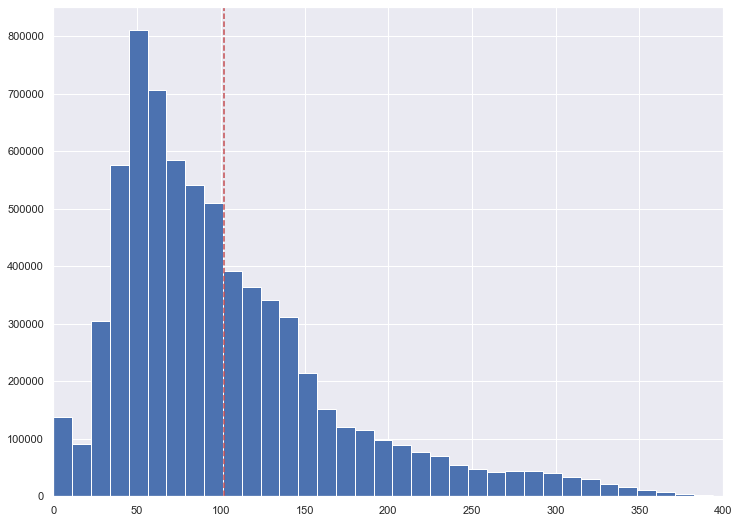

In [26]:
plt.figure(figsize=(12,9))
plt.hist(df['AirTime'],bins=120);
plt.axvline(x=df['AirTime'].mean(),color='r', linestyle='--', label='Average Time');
plt.xlim(0,400);

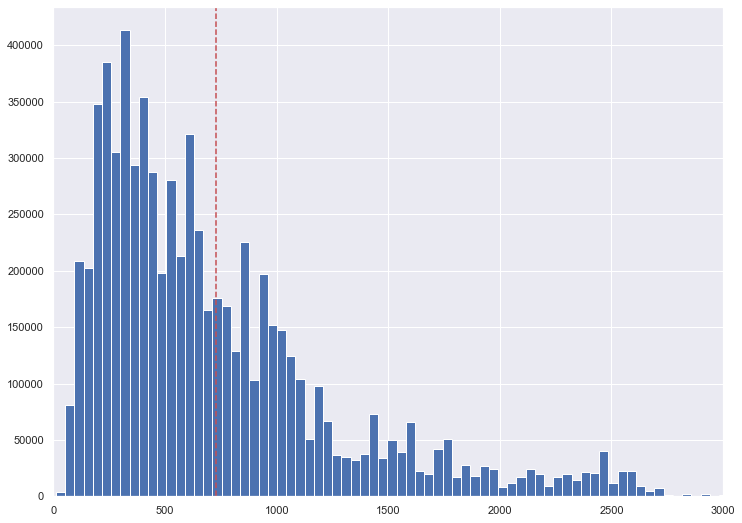

In [27]:
plt.figure(figsize=(12,9))
plt.hist(df['Distance'],bins=120);
plt.axvline(x=df['Distance'].mean(),color='r', linestyle='--', label='Average. Distance')
plt.xlim(0,3000);

Both are right skewed histogram

# What were the best and worst hours to fly?

In [64]:
df_cancel['CRSDepTime'] = df_cancel['CRSDepTime'].apply(lambda x:x[:2])
df_cancel['CRSDepTime'].value_counts()
order = df_cancel['CRSDepTime'].value_counts().sort_index().index

5:00 PM and 4:00 PM were the worst time to fly as they had most cancelled flights but in the other hand from 12:00 AM to 04:00 are the best time to fly they had a very little number of cancellation

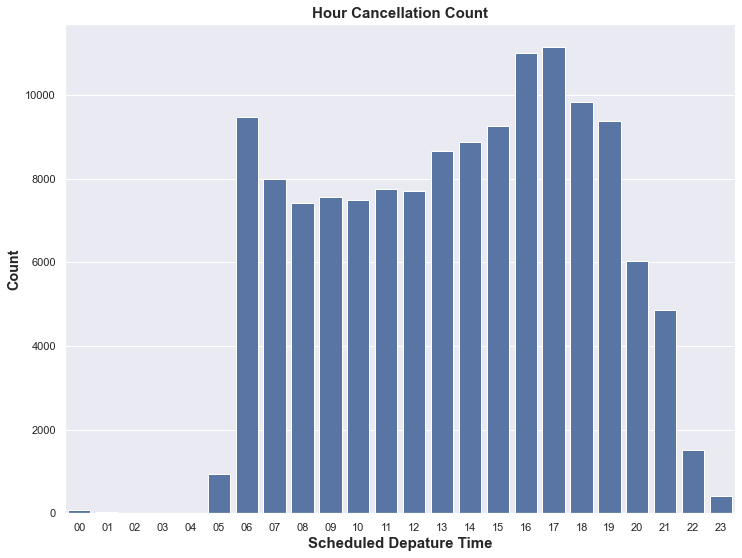

In [65]:
plt.figure(figsize=(12,9))
sns.countplot(df_cancel['CRSDepTime'],order=order,color=sns.color_palette()[0]);
plt.xlabel('Scheduled Depature Time', fontsize = 15, weight = "bold");
plt.ylabel('Count', fontsize = 15, weight = "bold",size='large');
plt.title('Hour Cancellation Count',fontsize=15,weight='bold');

# Bivariate Exploration

In [30]:
df.corr()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ActualElapsedTime,1.000000,0.949171,0.984428,0.098404,0.052178,0.936354,0.197938,0.302584,0.017357,-0.009110,0.140421,0.003571,-0.003989
CRSElapsedTime,0.949171,1.000000,0.964192,0.013657,0.036463,0.982847,0.107194,0.145322,0.013451,-0.019453,0.069362,0.003041,-0.007924
AirTime,0.984428,0.964192,1.000000,0.040304,0.034777,0.960754,0.122131,0.145341,0.018841,-0.017976,0.086202,0.004208,0.003818
ArrDelay,0.098404,0.013657,0.040304,1.000000,0.926786,0.007788,0.126512,0.320474,0.206089,0.147117,0.217676,0.000597,0.269290
DepDelay,0.052178,0.036463,0.034777,0.926786,1.000000,0.027476,0.031118,0.106601,0.243913,0.149159,0.122873,0.002385,0.320946
Distance,0.936354,0.982847,0.960754,0.007788,0.027476,1.000000,0.082188,0.096226,0.014873,-0.024346,0.050509,0.003372,-0.002286
TaxiIn,0.197938,0.107194,0.122131,0.126512,0.031118,0.082188,1.000000,0.076830,0.001870,0.015544,0.154593,-0.003271,-0.010425
TaxiOut,0.302584,0.145322,0.145341,0.320474,0.106601,0.096226,0.076830,1.000000,-0.004620,0.043399,0.297395,-0.001357,-0.043284
CarrierDelay,0.017357,0.013451,0.018841,0.206089,0.243913,0.014873,0.001870,-0.004620,1.000000,-0.041700,-0.123079,-0.013848,-0.123531
WeatherDelay,-0.009110,-0.019453,-0.017976,0.147117,0.149159,-0.024346,0.015544,0.043399,-0.041700,1.000000,0.003296,-0.005588,-0.027308


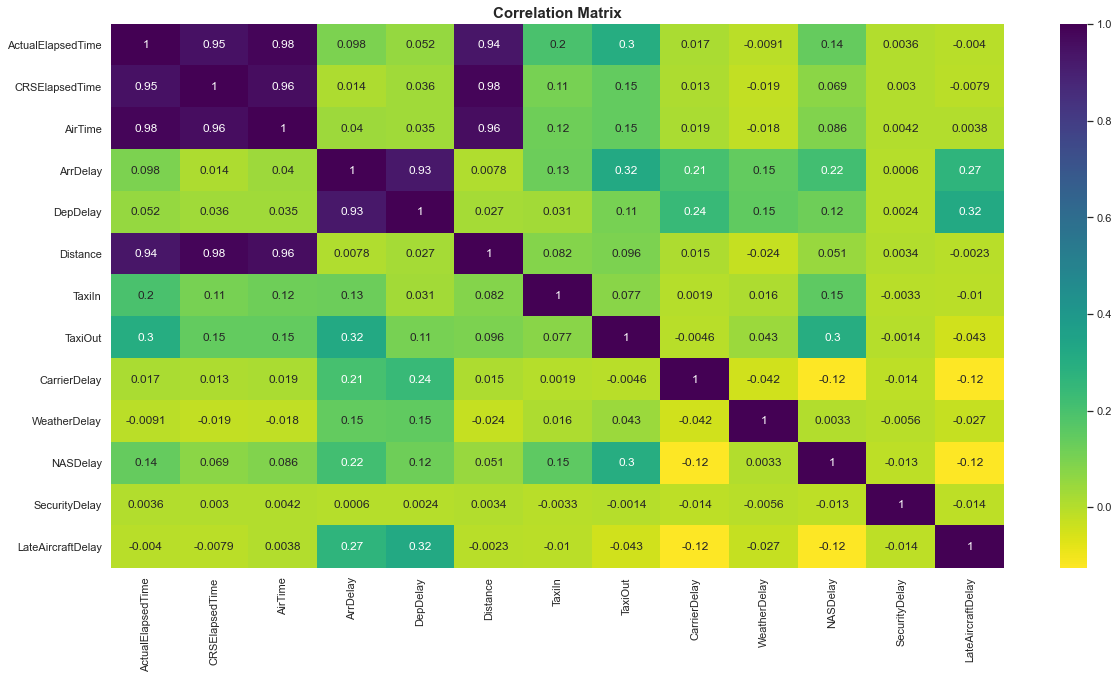

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis_r');
plt.title("Correlation Matrix", fontsize=15, weight='bold');

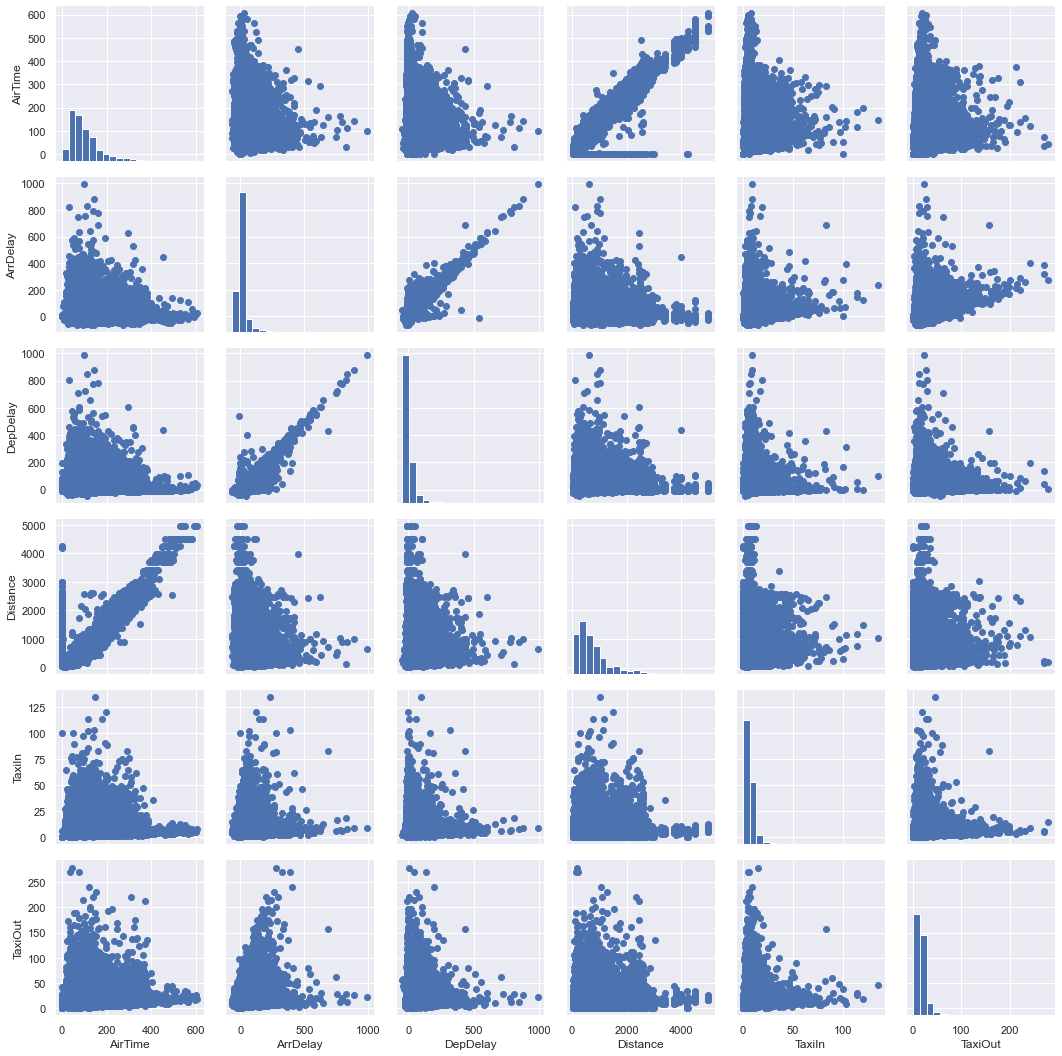

In [32]:
numeric_vars = ['AirTime', 'ArrDelay','DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']

samples = np.random.choice(df.shape[0], 100000, replace = False)
flights_samp = df.loc[samples,:]
g = sns.PairGrid(data = flights_samp,vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

There are positive correlation coefficients among Distance, AirTime, ArrDelay and DepDelay

# Relationship between ArrDelay and Dep Delay

There is a strong and positve correlation between them, If it departured late then it will arrive late

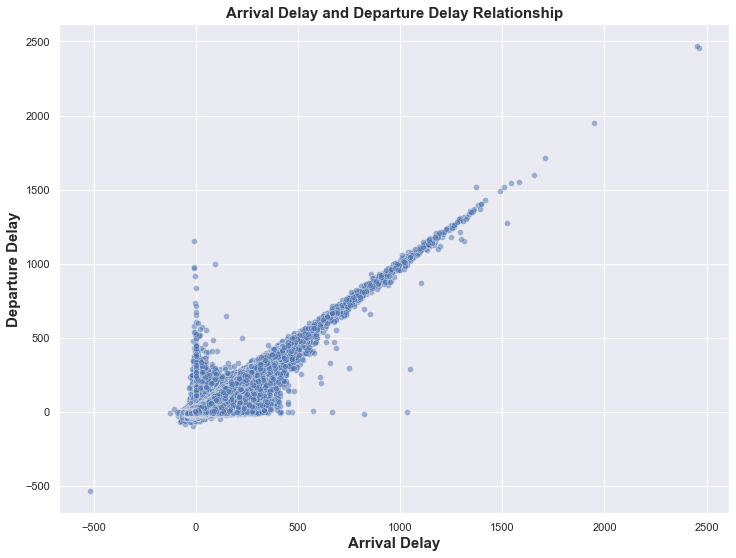

In [55]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x = 'ArrDelay', y = 'DepDelay',alpha=0.5,x_jitter=0.3);
plt.ylabel("Departure Delay",fontsize = 15, weight = "bold");
plt.xlabel("Arrival Delay",fontsize = 15, weight = "bold");
plt.title('Arrival Delay and Departure Delay Relationship',fontsize=15,weight='bold');

Months 12 and 6 have the most delay in Arrival and Departure

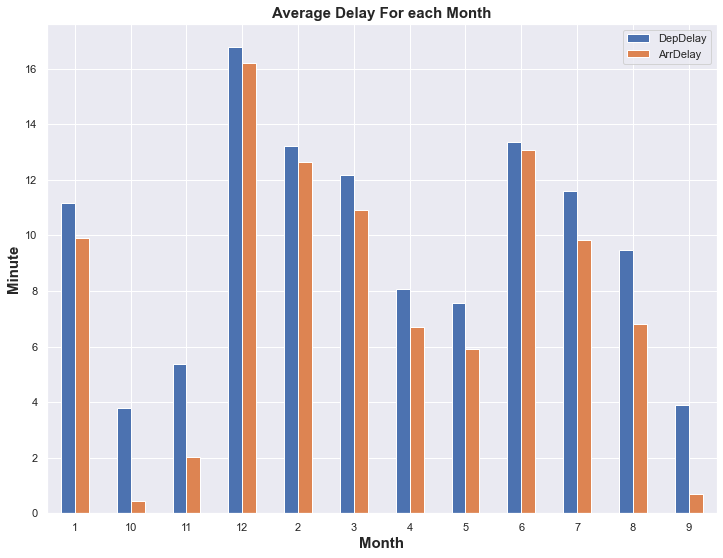

In [57]:
df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar(figsize=(12,9),rot=0);
plt.xlabel("Month",fontsize=15,weight='bold');
plt.ylabel("Minute",fontsize=15,weight='bold');
plt.title('Average Delay For each Month',fontsize=15,weight='bold');

05:00 AM to 07:00 AM have the least delays so they are the best hours to fly

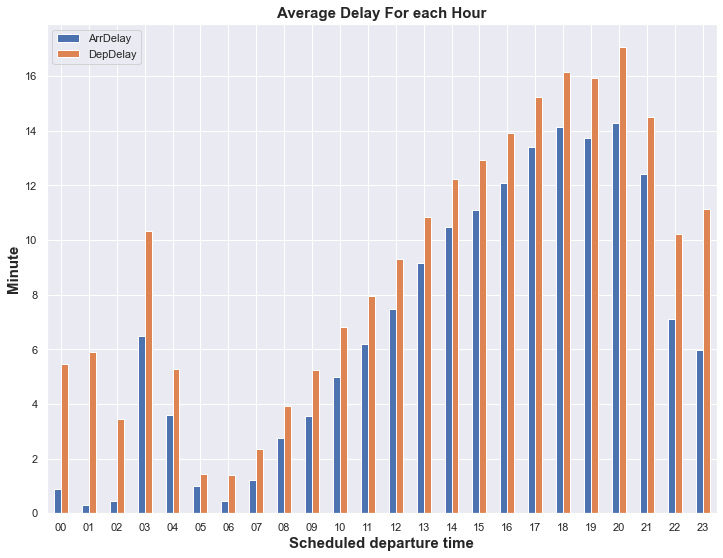

In [58]:
df_copy = df.copy()
df_copy['CRSDepTime'] = df_copy['CRSDepTime'].apply(lambda x:x[:2])
df_copy.groupby('CRSDepTime').agg({'ArrDelay':'mean','DepDelay':'mean'}).plot.bar(figsize=(12,9),rot=0);
plt.xlabel("Scheduled departure time",fontsize=15,weight='bold');
plt.ylabel("Minute",fontsize=15,weight='bold');
plt.title('Average Delay For each Hour',fontsize=15,weight='bold');

# Which carrier has the most delay?

Misa Airlines (YV) had the most delayed flights

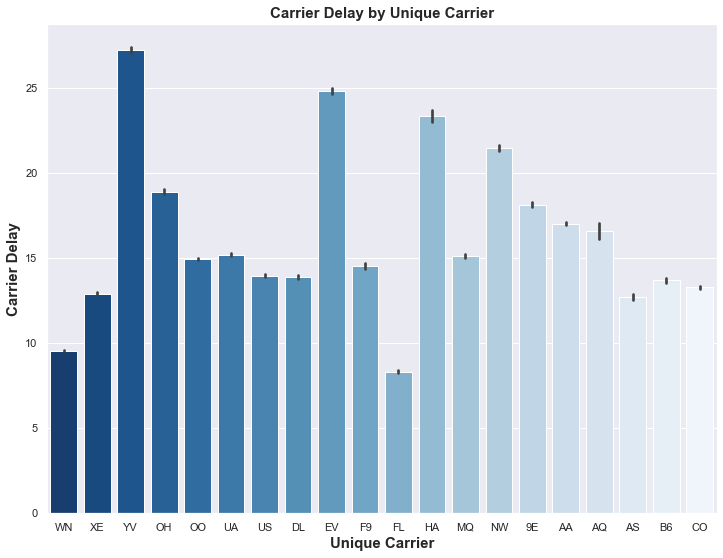

In [36]:
plt.figure(figsize=(12,9))
sns.barplot(data=df, x="UniqueCarrier", y="CarrierDelay", palette='Blues_r');
plt.title("Carrier Delay by Unique Carrier", fontsize = 15, weight = "bold")
plt.ylabel('Carrier Delay', fontsize = 15, weight = "bold")
plt.xlabel('Unique Carrier', fontsize = 15, weight = "bold")

plt.show()

# Multivariate Exploration

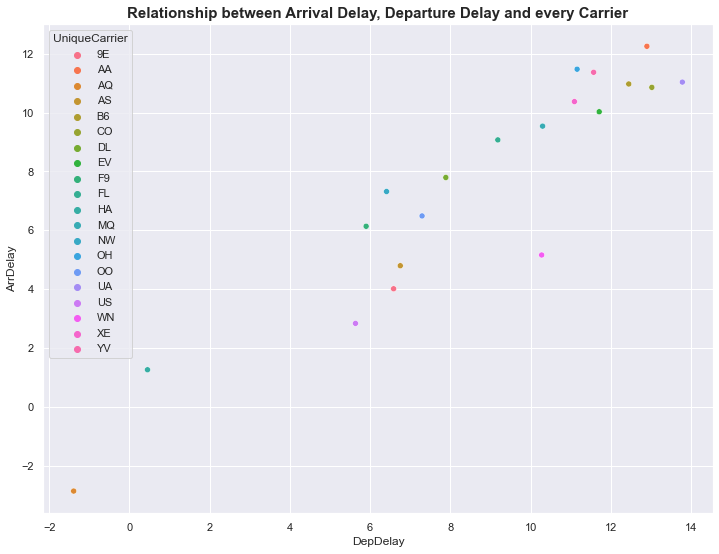

In [56]:
carrier_delay = df.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).reset_index()
plt.figure(figsize=(12,9))
sns.scatterplot('DepDelay', 'ArrDelay', data=carrier_delay, hue='UniqueCarrier')
plt.title('Relationship between Arrival Delay, Departure Delay and every Carrier',fontsize=15,weight='bold')
plt.show()

# Relationship between Depature delay and Arrival delay for each carrier

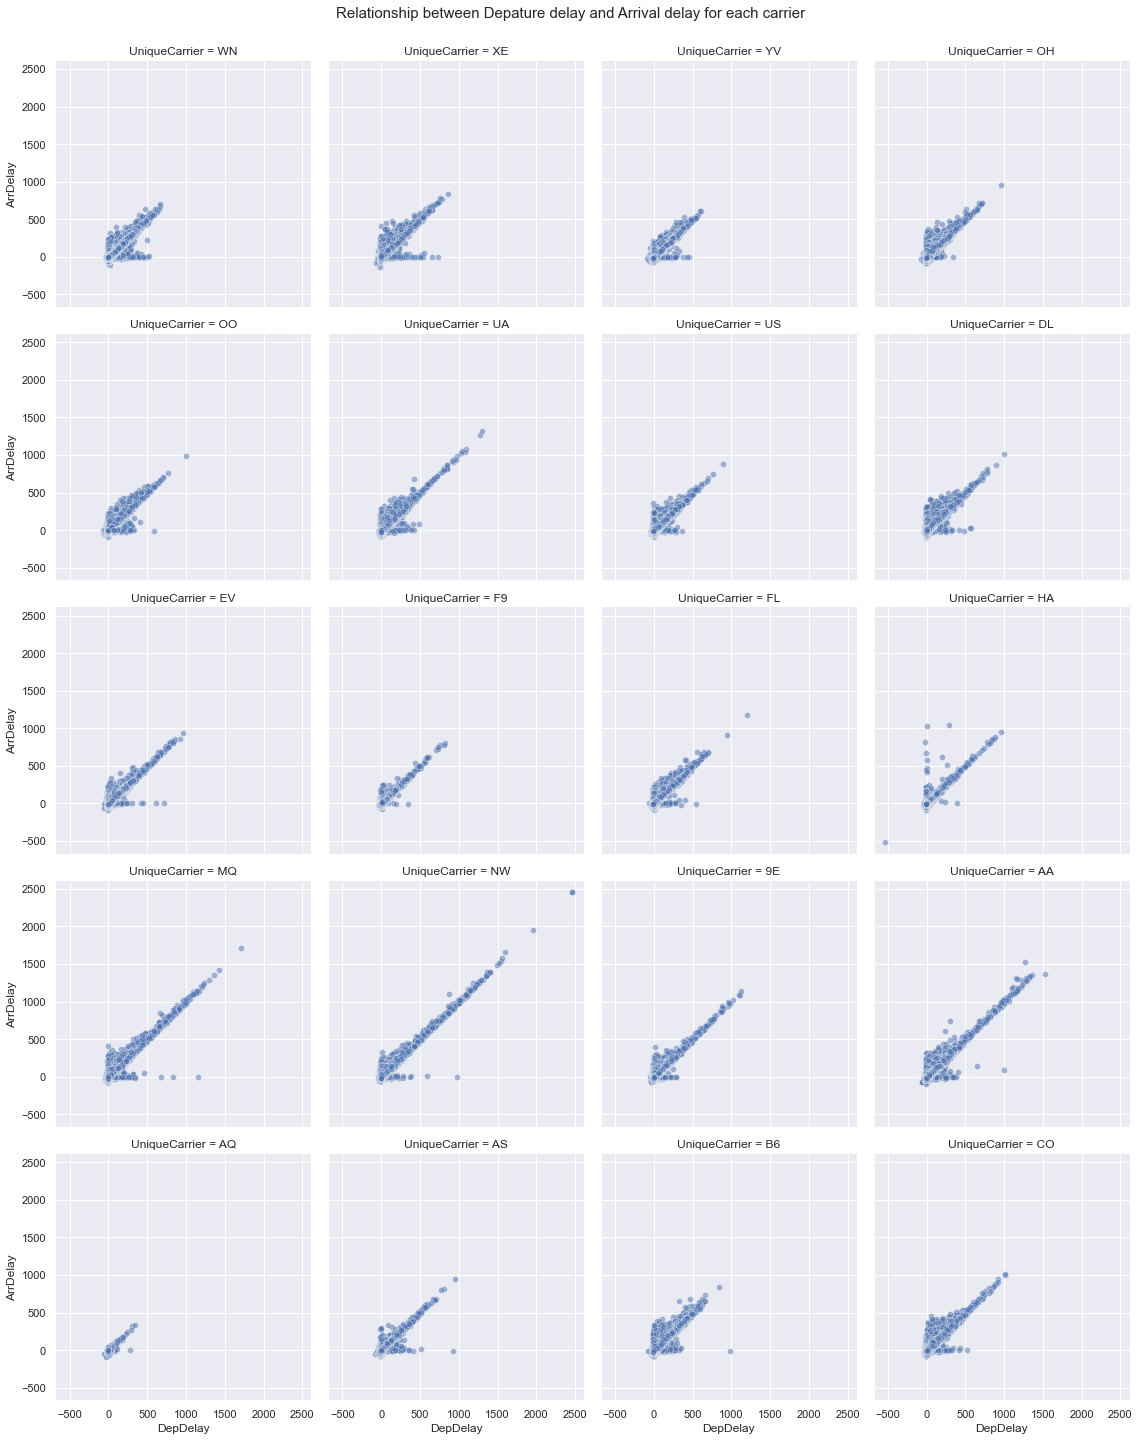

In [60]:
g = sns.FacetGrid(data=df, col='UniqueCarrier', col_wrap=4, height=4)
g.fig.suptitle('Relationship between Depature delay and Arrival delay for each carrier', fontsize=15,y=1);
g.map(sns.scatterplot, 'DepDelay', 'ArrDelay', alpha=0.5)
plt.show()

# Conclusions

1. Only 1.96% of the flights was cancelled
2. Biggest reasons of cancellation was weather and carrier
3.The most canceled flights were in February, December and January, It's obvious that it is because winter
4. Chicago O'Hare International Airport had the most cancelled flights
5. Misa Airlines (YV) had the most delayed flights
5. 05:00 AM to 07:00 AM have the least delays so they are the best hours to fly

In [ ]:
! jupyter nbconvert Flights_EDA_Slides.ipynb --to slides --post serve --no-input